# <font color="red">U2OS VQ1 Codebook Hierarchical Clustering and Feature Spectra<font/>


In [1]:
import os
import sys

import scipy
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import defaultdict
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist
from scipy.stats import spearmanr, pearsonr

%matplotlib inline
%reload_ext autoreload
%autoreload 2
%aimport
warnings.filterwarnings('ignore')
os.environ['MOMAPS_HOME'] = '/home/labs/hornsteinlab/Collaboration/MOmaps'
sys.path.insert(1, os.getenv('MOMAPS_HOME'))
from src.common.lib.feature_spectra_utils import *

Modules to reload:
all-except-skipped

Modules to skip:



In [2]:
CYTOSELF_MODEL_PATH = '/home/labs/hornsteinlab/Collaboration/MOmaps/outputs/models_outputs_cytoself_qsplit9/'
EMBEDDINGS_FOLDER = os.path.join(CYTOSELF_MODEL_PATH, 'embeddings', 'U2OS', 'vqindhist1')
SAVE_PATH = '/home/labs/hornsteinlab/Collaboration/MOmaps/outputs/figures/manuscript/sup_fig2/'

## Load vqindhist of U2OS cells

In [3]:
vqindhist, labels, paths = load_multiple_vqindhists(batches=['U2OS_spd_format'], 
                                                    embeddings_folder=EMBEDDINGS_FOLDER, 
                                                    datasets=['all'])

## Save the histograms in a dataframe (hist_df) and add the label

In [4]:
hist_df = create_vqindhists_df(vqindhist, labels, paths)
print(hist_df.shape)
hist_df.sample(5)

(3620, 2050)


,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,path,label
215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,DAPI_U2OS_Untreated_U2OS_rep1
3407,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,Phalloidin_U2OS_stress_U2OS_rep1
943,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,G3BP1_U2OS_Untreated_U2OS_rep1
2163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,DAPI_U2OS_stress_U2OS_rep1
3571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,/home/labs/hornsteinlab/Collaboration/MOmaps/i...,Phalloidin_U2OS_stress_U2OS_rep1


In [5]:
print(f"Labels: {hist_df['label'].unique()} \n\n")


Labels: ['DAPI_U2OS_Untreated_U2OS_rep1' 'DCP1A_U2OS_Untreated_U2OS_rep1'
 'G3BP1_U2OS_Untreated_U2OS_rep1' 'Phalloidin_U2OS_Untreated_U2OS_rep1'
 'DAPI_U2OS_stress_U2OS_rep1' 'DCP1A_U2OS_stress_U2OS_rep1'
 'G3BP1_U2OS_stress_U2OS_rep1' 'Phalloidin_U2OS_stress_U2OS_rep1'] 




# <font color="purple">Clustering of codebook vectors calculation step<font/>

In [ ]:
# Correlate codebook vectors (heatmap)
clustermap, codebook_corr = create_codebook_heatmap(hist_df.drop(columns='path'), 
                                                    corr_method='pearson', 
                                                    calc_linkage=True, 
                                                    linkage_method='ward' #'complete', 'average', 'median', 'ward'
                                                    )


Computing pearson correlation of 8 labels based on 2048 codebook vectors


## Cut the dendrogram to get indices clusters

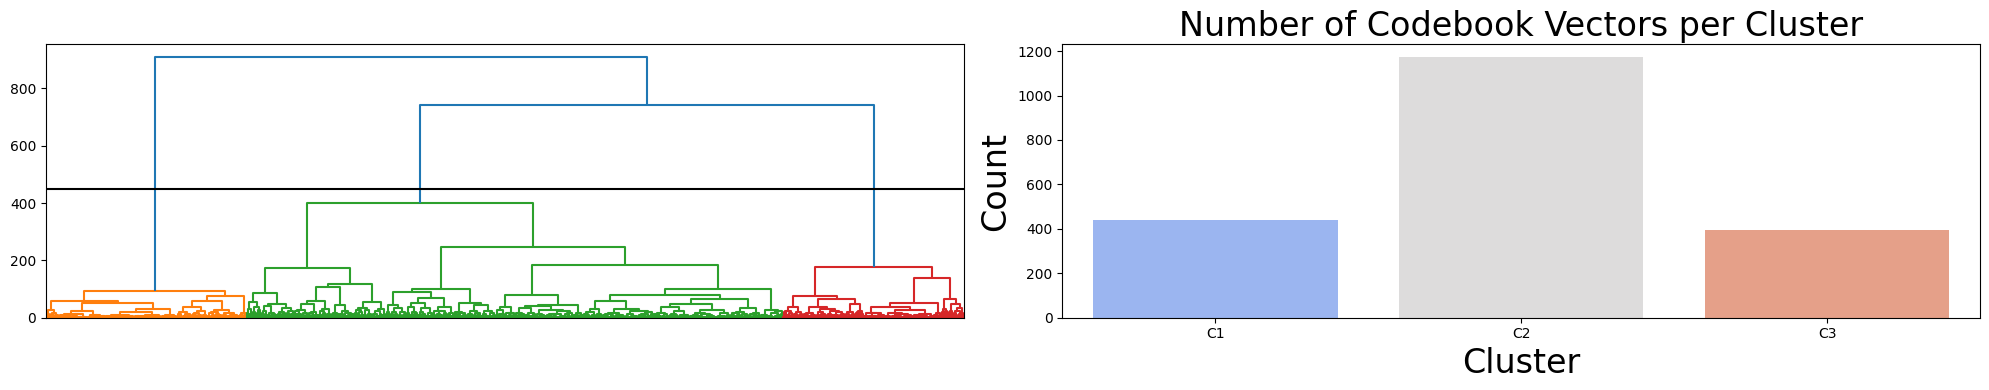

In [7]:
# decide on num of clusters by dendogram (and number of codebook vectors in each cluster)
corr_with_clusters = set_num_clusters_by_dendrogram(clustermap, 
                                                    codebook_corr, 
                                                    cutoff=450)

# Fetch the cluster assignment of each codebook vector
codebook_vec_cluster_assignment = corr_with_clusters[['cluster']]


# <font color="purple"> Find representative images per cluster </font>

Showing more than one label = True


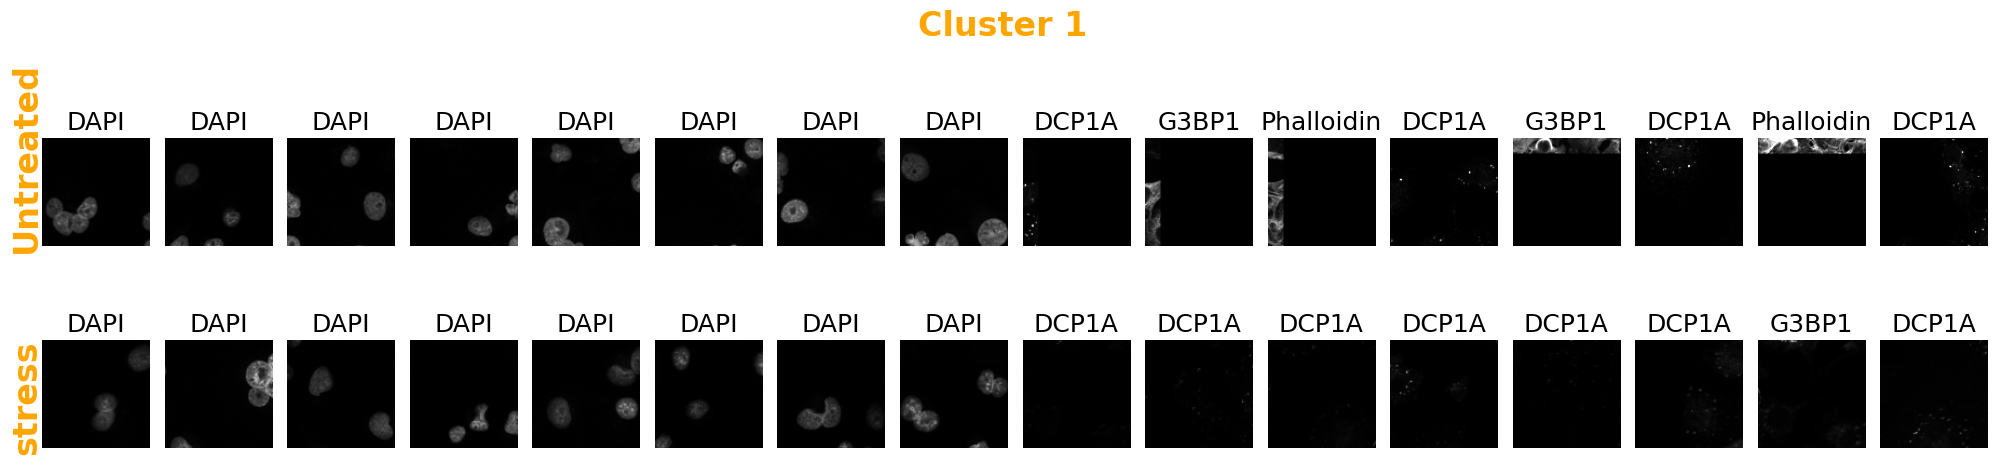

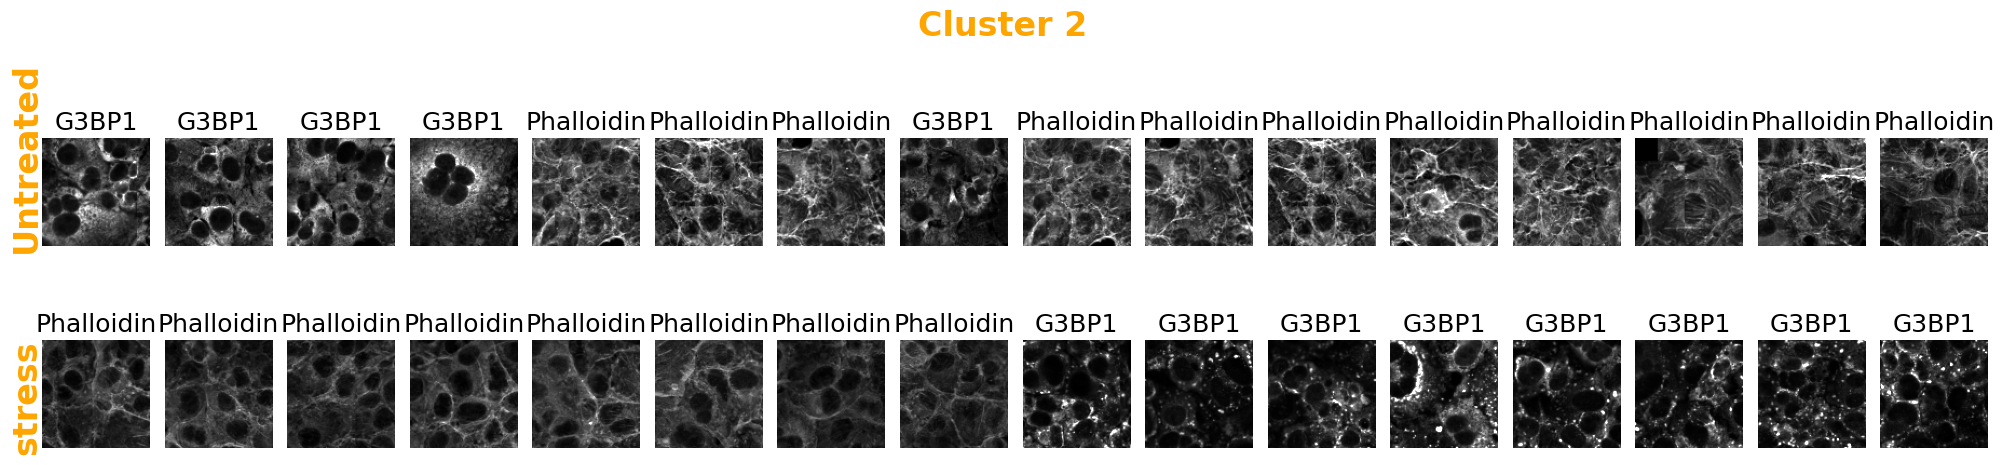

In [ ]:
# Retuns max cluster for each tile AKA assigns tile images to clusters 
tile_score_per_cluster = find_max_cluster_per_tile(codebook_vec_cluster_assignment, 
                                                   hist_df, 
                                                   norm_by='cluster_size')

# Plot the tiles per cluster (and condition?)
rep_tiles_per_cluster = plot_representative_tiles(tile_score_per_cluster, top_images=16, 
                                                  by_conditions=['Untreated', 'stress'], 
                                                  show_other_labels=True, 
                                                  figsize=(20,6))

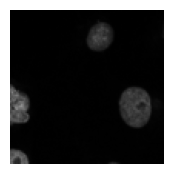

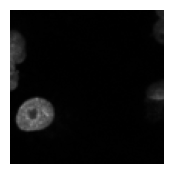

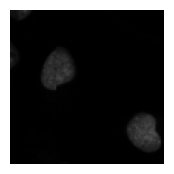

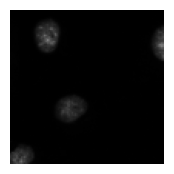

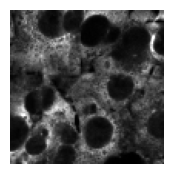

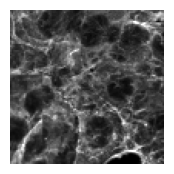

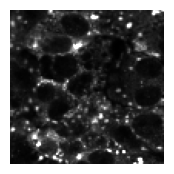

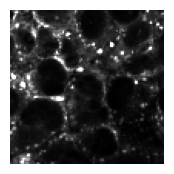

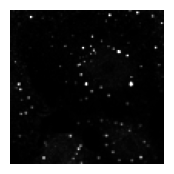

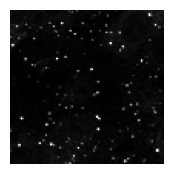

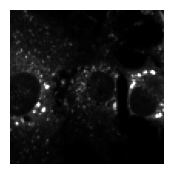

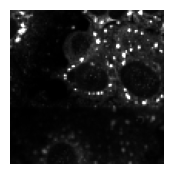

In [9]:
chosen_idx_dict = {}
# Cluster 1
chosen_idx_dict[1] = [[2,6], [2,5]]
# Cluster 2
chosen_idx_dict[2] = [[2,8], [14,15]]
# Cluster 3
chosen_idx_dict[3] = [[3,6], [10,14]]

save_representative_tiles(rep_tiles_per_cluster, chosen_idx_dict, to_save=True, save_path=SAVE_PATH)

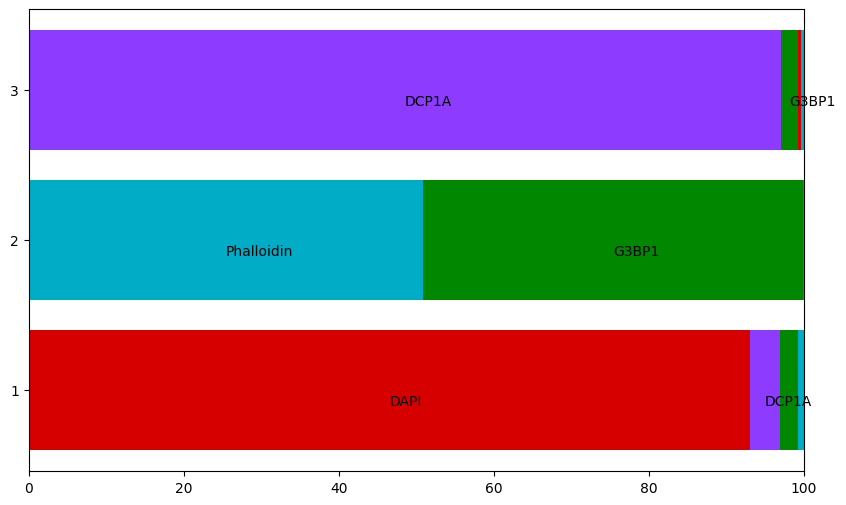

In [10]:
plot_tile_label_pct_in_cluster(tile_score_per_cluster)

# <font color="purple"> Mean histogram per label - Feature Spectra  </font>

In [11]:
# Prepare data for hisograms
hist_df_agg = hist_df.copy()
# merging different batches and reps -> label == marker
hist_df_agg = hist_df_agg.drop(columns='path')
hist_df_agg['label'] = hist_df_agg['label'].str.split("_").str[0:3:2].apply(lambda x: '_'.join(x)) 

# <font color="purple"> Plot the heatmap and Feature Spectra histograms </font>

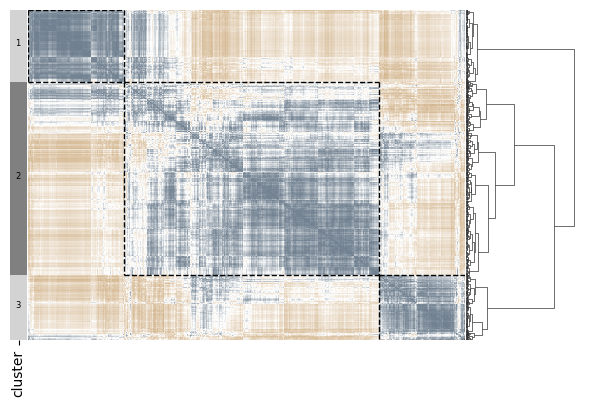

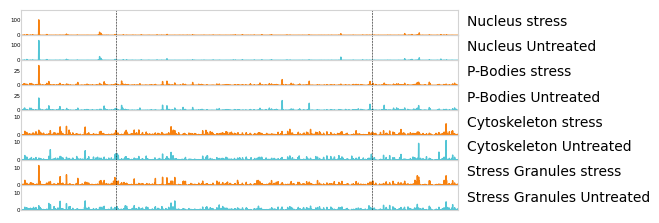

In [12]:

plot_heatmap_with_clusters_and_histograms(corr_with_clusters.sort_index(), 
                                          hist_df_agg, 
                                          labels=['G3BP1', 'Phalloidin', 'DCP1A', 'DAPI'], 
                                          color_by_cond=True, 
                                          save_path=SAVE_PATH, plot_hists=False, sep_histograms=True,
                                          to_save=True, hist_filename = "U2OS_FS_hists.eps", heatmap_filename="U2OS_FS_heatmap.tiff",  
                                          calc_linkage=True, 
                                          linkage_method='ward')

# <font color="purple"> Delta Feature Spectra histograms </font>

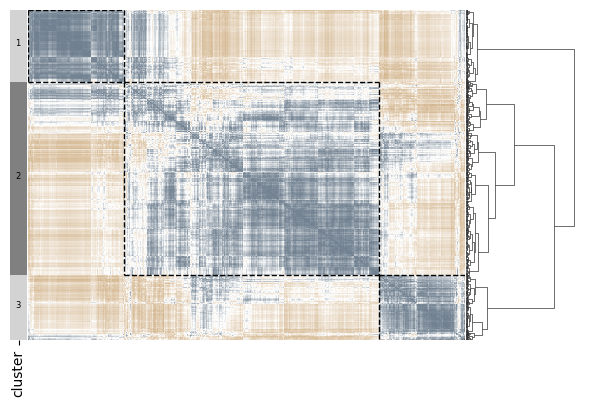

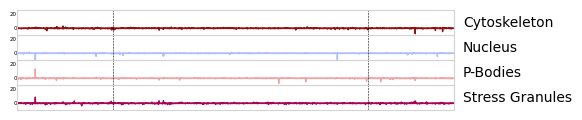

In [13]:
plot_heatmap_with_clusters_and_histograms(corr_with_clusters.sort_index(), 
                                          hist_df_agg,
                                          plot_delta=True, plot_hists=False,
                                          labels=[''],
                                          sep_histograms=True, 
                                          calc_linkage=True, linkage_method='ward',
                                          to_save=True, save_path=SAVE_PATH, 
                                          hist_filename = "U2OS_delta_FS_hists.eps")

In [14]:
print("Done")

Done


## Done!